# Drawing

This is about how to draw stuff on the images 

## Index
- [Setup](#setup)
- [Drawing - Lines](#line)
- [Drawing - Rectangles](#rectangle)
- [Drawing - Circles](#circle)
- [Text](#text)
- [Bounding Box Coordinate Transform](#bbox_cor)
- [Bounding Box](#bbox)
- [Master Piece](#master)

## Setup <a id='setup'></a>
Since we are using Matplotlib function to display image in this notebook, all color are in (R,G,B) format. If displayed using OpenCV function you should convert them to (B,G,R) format.

In [1]:
from collections import OrderedDict

import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_img_mpl (img, scale=5):
    figure = plt.figure(figsize=(1.92*scale, 1.08*scale))
    ax = figure.add_subplot()
    ax.axis('off')
    ax.imshow(img)

## Color strip

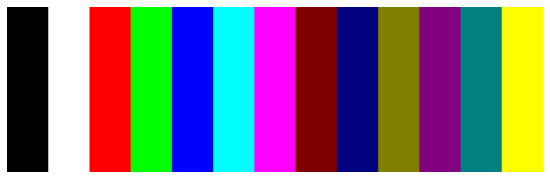

In [2]:
COLOR = OrderedDict({'BLACK': (0, 0, 0),
                     'WHITE': (255, 255, 255),
                     'RED': (255, 0, 0),
                     'GREEN': (0, 255, 0),
                     'BLUE': (0, 0, 255),
                     'AQUA': (0, 255, 255),
                     'FUCHSIA': (255, 0, 255),
                     'MAROON': (128, 0, 0),
                     'NAVY': (0, 0, 128),
                     'OLIVE': (128, 128, 0),
                     'PURPLE': (128, 0, 128),
                     'TEAL': (0, 128, 128),
                     'YELLOW': (255, 255, 0)})

canvas = np.zeros((100, len(COLOR)*25, 3), dtype='uint8')

for i, (color, value) in enumerate(COLOR.items()):
    canvas[:, i*25:(i+1)*25, :] = value

display_img_mpl(canvas)


## Drawing - Lines <a id='line'></a>

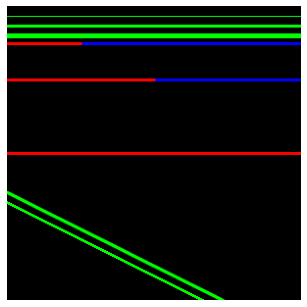

In [3]:
BLUE = (0, 0, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)

canvas = np.zeros((300,300,3), dtype='uint8')
# (img, pt1, pt2, color[, thickness[, lineType[, shift]]])
cv2.line(canvas, (0, 10), (300, 10), GREEN, 1)
cv2.line(canvas, (0, 20), (300, 20), GREEN, 2)
cv2.line(canvas, (0, 30), (300, 30), GREEN, 3)
# Shift is fraction bit in points
cv2.line(canvas, (0, 150), (300, 150), RED, 2, shift=0)
cv2.line(canvas, (0, 75), (300, 75), BLUE, 2)
cv2.line(canvas, (0, 150), (300, 150), RED, 2, shift=1)
cv2.line(canvas, (0, 38), (300, 38), BLUE, 2)
cv2.line(canvas, (0, 150), (300, 150), RED, 2, shift=2)
# LineType
cv2.line(canvas, (0, 200), (200, 300), GREEN, 2, lineType=cv2.LINE_8) # default
cv2.line(canvas, (0, 190), (220, 300), GREEN, 2, lineType=cv2.LINE_AA) # LINE_AA=16
# There are also cv2.FILLED cv2.LINE_4

display_img_mpl(canvas)

## Drawing - Rectangles <a id='rectangle'></a>

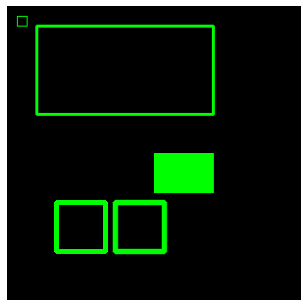

In [4]:
GREEN = (0, 255, 0)

canvas = np.zeros((300,300,3), dtype='uint8')
# (img, pt1, pt2, color[, thickness[, lineType[, shift]]])
cv2.rectangle(canvas, (10, 10), (20,20), GREEN, 1)
cv2.rectangle(canvas, (30, 20), (210,110), GREEN, 2)
cv2.rectangle(canvas, (150, 150), (210,190), GREEN, -1)

cv2.rectangle(canvas, (50, 200), (100,250), GREEN, 4, lineType=cv2.LINE_4)
cv2.rectangle(canvas, (110, 200), (160,250), GREEN, 4, lineType=cv2.LINE_AA)

display_img_mpl(canvas)

## Drawing - Circles <a id='circle'></a>

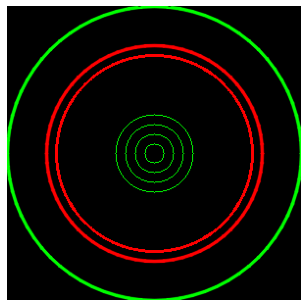

In [5]:
GREEN = (0, 255, 0)
RED = (255, 0, 0)

canvas = np.zeros((300,300,3), dtype='uint8')
# (img, center, radius, color[, thickness[, lineType[, shift]]])
cv2.circle(canvas, (150, 150), 10, GREEN, 1)
cv2.circle(canvas, (150, 150), 20, GREEN, 1)
cv2.circle(canvas, (150, 150), 30, GREEN, 1)
cv2.circle(canvas, (150, 150), 40, GREEN, 1)
cv2.circle(canvas, (150, 150), 100, RED, 2)
cv2.circle(canvas, (150, 150), 110, RED, 2, lineType=cv2.LINE_AA)
cv2.circle(canvas, (150, 150), 150, GREEN, 2, lineType=cv2.LINE_AA)

display_img_mpl(canvas)

## Text <a id='text'></a>

getTextSize output: ((264, 22), 10)


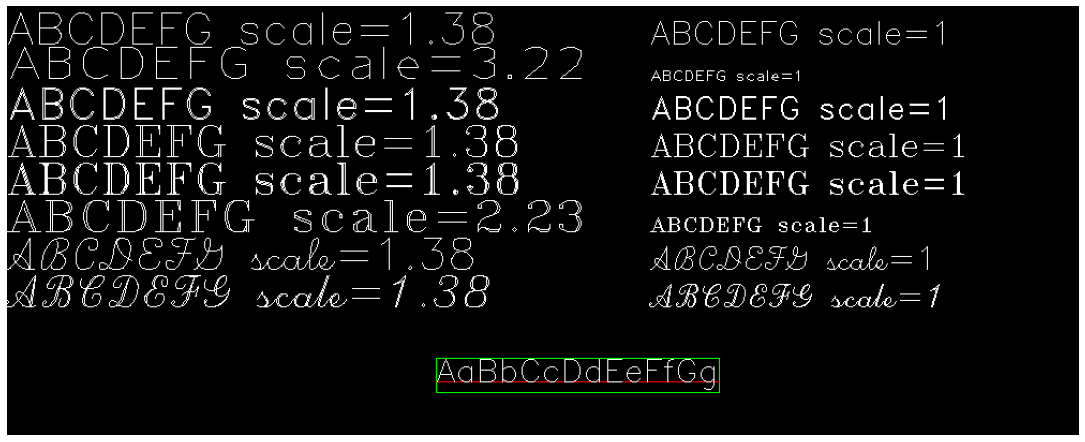

In [6]:
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)

canvas = np.zeros((400,1000,3), dtype='uint8')
thickness = 1
height = 30
CV2_FONT = [cv2.FONT_HERSHEY_SIMPLEX,               # 0
            cv2.FONT_HERSHEY_PLAIN,                 # 1
            cv2.FONT_HERSHEY_DUPLEX,                # 2
            cv2.FONT_HERSHEY_COMPLEX,               # 3
            cv2.FONT_HERSHEY_TRIPLEX,               # 4
            cv2.FONT_HERSHEY_COMPLEX_SMALL,         # 5
            cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,        # 6
            cv2.FONT_HERSHEY_SCRIPT_COMPLEX]        # 7

# display different font in equal height
# (img, text, org, fontFace, fontScale, color, [thickness, [lineType, [bottomLeftOrigin]]])
for i, font in enumerate(CV2_FONT):
    # cv2 font has inherent size you can calculate desire scale by given desired height
    scale = cv2.getFontScaleFromHeight(font, height, thickness)
    cv2.putText(canvas, f'ABCDEFG scale={scale:.2f}', (0,(height+5)*(i+1)), font, scale, WHITE, thickness)

# font display with the same scale
for i, font in enumerate(CV2_FONT):
    cv2.putText(canvas, f'ABCDEFG scale=1', (600,(height+5)*(i+1)), font, 1, WHITE, thickness)

# you can calculate the size of text will be occupy using this function
# It will return ((w, h), baseline)
# Baseline is the y-coordinate of the baseline relative to the bottom-most text point
# Baseline are useful when there is lower case letter that will render lower than common bottom part of letter such as "g"
text = 'AaBbCcDdEeFfGg'
font = cv2.FONT_HERSHEY_SIMPLEX
scale = 1
thickness = 1
size, baseline = cv2.getTextSize(text, font, scale, thickness)
text_org = (400, 350)
print(f"getTextSize output: {size, baseline}")
# draw a tight box around text 
cv2.rectangle(canvas, (text_org[0], text_org[1]-size[1]), (text_org[0]+size[0], text_org[1]+baseline), GREEN)
# draw baseline
cv2.line(canvas, text_org, (text_org[0]+size[0], text_org[1]), RED)
# draw text
cv2.putText(canvas, text, text_org, font, scale, WHITE, thickness)

display_img_mpl(canvas, scale=10)

## Bounding Box Coordinate Transform <a id='bbox_cor'></a>

In [7]:
# tlwh: (top left x, top left y, width, height)
# xywh: (center x, center y, width, height)
# xyxy: (top left x, top left y, bottom right x, bottom right y)

def tlwh2xywh (bbox_tlwh):
    if isinstance(bbox_tlwh, list) or isinstance(bbox_tlwh, tuple):
        bbox_xywh = [0, 0, 0, 0]
    if isinstance(bbox_tlwh, np.ndarray):
        bbox_xywh = bbox_tlwh.copy()
    # if isinstance(bbox_tlwh, torch.Tensor):
    #     boxes_xywh = bbox_tlwh.clone()

    bbox_xywh[0] = bbox_tlwh[0] + bbox_tlwh[2]/2
    bbox_xywh[1] = bbox_tlwh[1] + bbox_tlwh[3]/2
    bbox_xywh[2] = bbox_tlwh[2]
    bbox_xywh[3] = bbox_tlwh[3]
    return bbox_xywh


def tlwh2xyxy (bbox_tlwh):
    if isinstance(bbox_tlwh, list) or isinstance(bbox_tlwh, tuple):
        bbox_xyxy = [0, 0, 0, 0]
    if isinstance(bbox_tlwh, np.ndarray):
        bbox_xyxy = bbox_tlwh.copy()
    # if isinstance(bbox_tlwh, torch.Tensor):
    #     bbox_xyxy = bbox_tlwh.clone()

    bbox_xyxy[0] = bbox_tlwh[0]
    bbox_xyxy[1] = bbox_tlwh[1]
    bbox_xyxy[2] = bbox_tlwh[0] + bbox_tlwh[2]
    bbox_xyxy[3] = bbox_tlwh[1] + bbox_tlwh[3]
    return bbox_xyxy


def xywh2tlwh (bbox_xywh):
    if isinstance(bbox_xywh, list) or isinstance(bbox_xywh, tuple):
        bbox_tlwh = [0, 0, 0, 0]
    if isinstance(bbox_xywh, np.ndarray):
        bbox_tlwh = bbox_xywh.copy()
    # if isinstance(bbox_xywh, torch.Tensor):
    #     bbox_tlwh = bbox_xywh.clone()

    bbox_tlwh[0] = bbox_xywh[0] - bbox_xywh[2]/2
    bbox_tlwh[1] = bbox_xywh[1] - bbox_xywh[3]/2
    bbox_tlwh[2] = bbox_xywh[2]
    bbox_tlwh[3] = bbox_xywh[3]
    return bbox_tlwh


def xywh2xyxy (bbox_xywh):
    if isinstance(bbox_xywh, list) or isinstance(bbox_xywh, tuple):
        bbox_xyxy = [0, 0, 0, 0]
    if isinstance(bbox_xywh, np.ndarray):
        bbox_xyxy = bbox_xywh.copy()
    # if isinstance(bbox_xywh, torch.Tensor):
    #     bbox_xyxy = bbox_xywh.clone()

    bbox_xyxy[0] = bbox_xywh[0] - bbox_xywh[2]/2
    bbox_xyxy[1] = bbox_xywh[1] - bbox_xywh[3]/2
    bbox_xyxy[2] = bbox_xywh[0] + bbox_xywh[2]/2
    bbox_xyxy[3] = bbox_xywh[1] + bbox_xywh[2]/2
    return bbox_xyxy


def xyxy2tlwh (bbox_xyxy):
    if isinstance(bbox_xyxy, list) or isinstance(bbox_xyxy, tuple):
        bbox_tlwh = [0, 0, 0, 0]
    if isinstance(bbox_xyxy, np.ndarray):
        bbox_tlwh = bbox_xyxy.copy()
    # if isinstance(bbox_xyxy, torch.Tensor):
    #     bbox_tlwh = bbox_xyxy.clone()

    bbox_tlwh[0] = bbox_xyxy[0]
    bbox_tlwh[1] = bbox_xyxy[1]
    bbox_tlwh[2] = bbox_xyxy[2] - bbox_xyxy[0]
    bbox_tlwh[3] = bbox_xyxy[3] - bbox_xyxy[1]
    return bbox_tlwh


def xyxy2xywh (bbox_xyxy):
    if isinstance(bbox_xyxy, list) or isinstance(bbox_xyxy, tuple):
        bbox_xywh = [0, 0, 0, 0]
    if isinstance(bbox_xyxy, np.ndarray):
        bbox_xywh = bbox_xyxy.copy()
    # if isinstance(bbox_xyxy, torch.Tensor):
    #     bbox_xywh = bbox_xyxy.clone()

    bbox_xywh[0] = (bbox_xyxy[0] + bbox_xyxy[2])/2
    bbox_xywh[1] = (bbox_xyxy[1] + bbox_xyxy[3])/2
    bbox_xywh[2] = bbox_xyxy[2] - bbox_xyxy[0]
    bbox_xywh[3] = bbox_xyxy[3] - bbox_xyxy[1]
    return bbox_xywh

## Bounding Box <a id='bbox'></a>

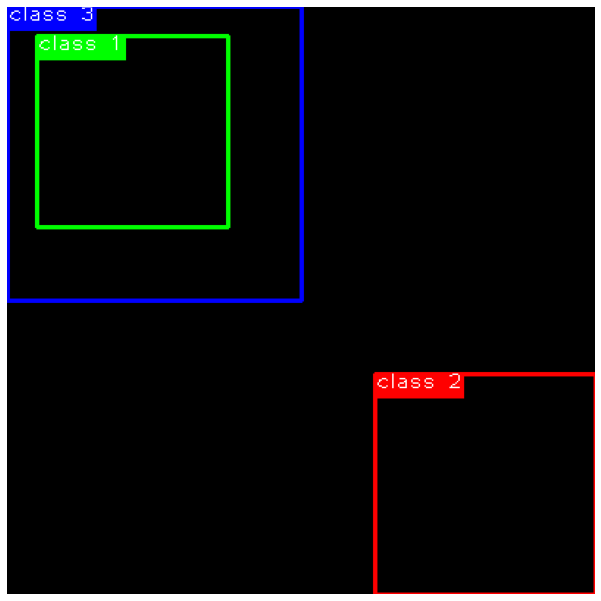

In [8]:
def draw_bbox (img, bbox_xyxy, text, text_height=10, thickness=2, color=(0, 255, 0), text_color=(255,255,255), font=cv2.FONT_HERSHEY_PLAIN):
    img_h = img.shape[0]
    img_w = img.shape[1]
    tl = (max(bbox_xyxy[0], 0), max(bbox_xyxy[1], 0))
    br = (min(bbox_xyxy[2], img_w), min(bbox_xyxy[3], img_h))
    text_org = (tl[0], tl[1] + text_height)

    # draw boxes 
    cv2.rectangle(img, tl, br, color, thickness)
    # draw text 
    scale = cv2.getFontScaleFromHeight(font, text_height, 1)
    size, baseline = cv2.getTextSize(text, font, scale, 1)
    cv2.rectangle(canvas, (text_org[0], text_org[1]-size[1]), (text_org[0]+size[0], text_org[1]+baseline), color, -1)
    cv2.putText(canvas, text, text_org, font, scale, text_color, 1)

GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)

canvas = np.zeros((400,400,3), dtype='uint8')

# xyxy format
bbox = (20, 20, 150 , 150)
out_of_bound_bbox = (250, 250, 430, 450)
out_of_bound_bbox2 = (-50, -80, 200, 200)

draw_bbox(canvas, bbox, 'class 1')
draw_bbox(canvas, out_of_bound_bbox, 'class 2', color=RED)
draw_bbox(canvas, out_of_bound_bbox2, 'class 3', color=BLUE)

display_img_mpl(canvas, scale=10)

## Master Piece <a id='master'></a>

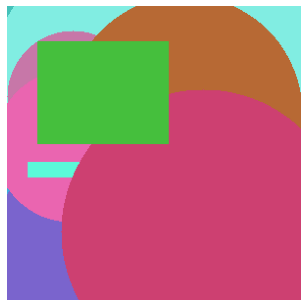

In [9]:
canvas = np.zeros((300,300,3), dtype='uint8')
for i in range(25):
    r = np.random.randint(5, 200)
    center = np.random.randint(20, 280, size=(2,))
    color = np.random.randint(50, 256, size=(3,)).tolist()
    pt1 = np.random.randint(20, 280, size=(2,))
    pt2 = np.random.randint(20, 280, size=(2,))
    cv2.circle(canvas, tuple(center), r, color, -1)
    color = np.random.randint(50, 256, size=(3,)).tolist()
    cv2.rectangle(canvas, tuple(pt1), tuple(pt2), color, -1)

display_img_mpl(canvas)